In [ ]:
## Cargar librerías necesarias para cálculos y
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/data_1.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [ ]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [ ]:
## Eliminamos la columna ID porque no la necesitamos para el ejemplo y visualmente no nos afecte.
# df = df.drop('ID', axis=1)

## Estandarizar los datos para mejorar el rendimiento de K-Means
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

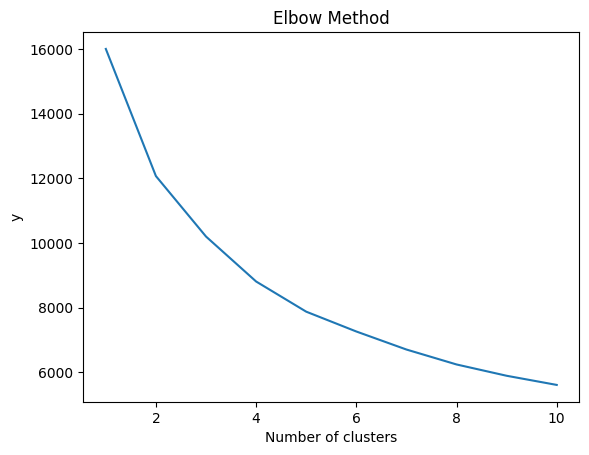

In [ ]:
y = []

## Creamos ciclo para determinar cual sería la cantidad de clusters que vamos a utilizar
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    y.append(kmeans.inertia_)

## Pintamos el gráfico para mirar el comportamiento de los clusters
plt.plot(range(1, 11), y)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('y')
plt.show()

In [ ]:
## Entrenamos el algoritmo Kmeans con cada uno de los clusters (4) que definimos según la gráfica anterior
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(df_scaled)

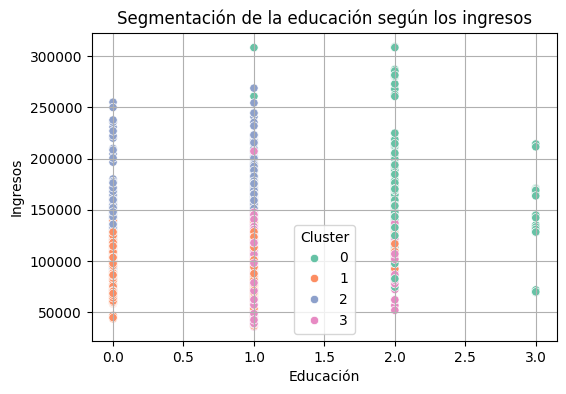

In [ ]:
#Visualización de clusters en 2D
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Education', y='Income', hue=y_kmeans, palette='Set2')
plt.title("Segmentación de la educación según los ingresos")
plt.xlabel("Educación")
plt.ylabel("Ingresos")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

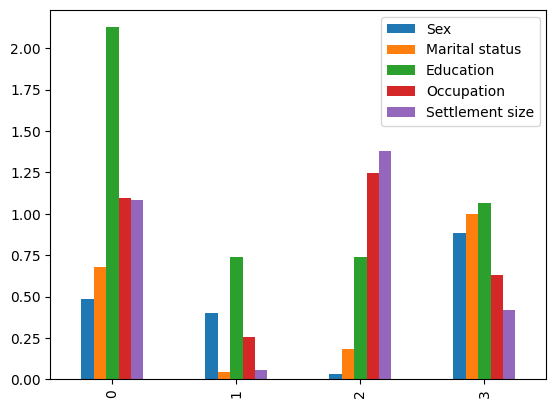

In [ ]:
## Promedios por clúster para interpretar segmentos
columnas_utiles = ['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']
df[columnas_utiles].groupby(y_kmeans).mean().plot.bar()
plt.show()